<img src="images/deeplearningwizard_web_logo.png" alt="deeplearningwizard" style="width: 100px;"/>

# 6. Linear Regression with PyTorch
## 1. About Linear Regression


### 1.1 Simple Linear Regression Basics
- Allows us to understand **relationship** between two **continuous variables**
- Example
    - x: independent variable
        - weight
    - y: dependent variable
        - height
- $y = \alpha x + \beta$

### 1.2 Example of simple linear regression

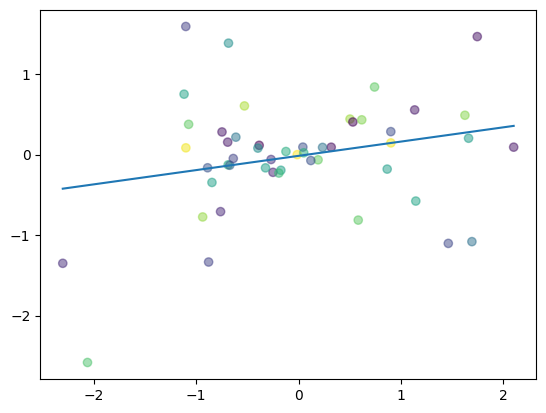

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

### 1.3 Aim of Linear Regression
- Minimize the distance between the points and the line ($y = \alpha x + \beta$)
- Adjusting
    - Coefficient: $\alpha$
    - Bias/intercept: $\beta$

## 2. Building a Linear Regression Model with PyTorch

### 2.1 Example
- Coefficient: $\alpha = 2$
- Bias/intercept: $\beta = 1$
- Equation: $y = 2x + 1$

### 2.2 Building a Toy Dataset

In [2]:
x_values = [i for i in range(11)]

In [3]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [5]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

$y = 2x + 1$

In [6]:
y_values = [2*i + 1 for i in x_values]

In [7]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [8]:
# In case you're weak in list iterators...
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result) 

In [9]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [10]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [11]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

### 2.3 Building Model

**Critical Imports**

In [12]:
import torch
import torch.nn as nn

/home/pongthep_/main/Chula/2023/DL_23/vir_en/DL_23/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Create Model**
1. Linear model
    - True Equation: $y = 2x + 1$
2. Forward
    - Example
        - Input $x = 1 $
        - Output $\hat y = ?$

In [13]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

**Instantiate Model Class**
- input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [14]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

**Instantiate Loss Class**
- MSE Loss: Mean Squared Error
- $MSE = \frac{1}{n} \sum_{i=1}^n(\hat y_i - y_i)$
    - $\hat y$: prediction
    - $y$: true value

In [15]:
criterion = nn.MSELoss()

**Instantiate Optimizer Class**
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
        - parameters: $\alpha$ and $\beta$ in $ y = \alpha x + \beta$
        - desired parameters: $\alpha = 2$ and $\beta = 1$ in $ y = 2x + 1$

In [16]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Train Model**
- 1 epoch: going through the whole x_train data once
    - 100 epochs: 
        - 100x mapping `x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`
        
- Process 
    1. Convert inputs/labels to tensors with gradients
    2. Clear gradient buffets
    3. Get output given inputs 
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [17]:
epochs = 100

In [18]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 68.53142547607422
epoch 2, loss 6.146223545074463
epoch 3, loss 1.051450252532959
epoch 4, loss 0.6297416687011719
epoch 5, loss 0.5892696976661682
epoch 6, loss 0.5799620747566223
epoch 7, loss 0.5732631683349609
epoch 8, loss 0.5668436288833618
epoch 9, loss 0.5605117678642273
epoch 10, loss 0.5542529821395874
epoch 11, loss 0.5480636358261108
epoch 12, loss 0.5419436693191528
epoch 13, loss 0.5358918309211731
epoch 14, loss 0.529907763004303
epoch 15, loss 0.5239902138710022
epoch 16, loss 0.5181387066841125
epoch 17, loss 0.5123526453971863
epoch 18, loss 0.50663161277771
epoch 19, loss 0.500973641872406
epoch 20, loss 0.49537965655326843
epoch 21, loss 0.4898478388786316
epoch 22, loss 0.4843779504299164
epoch 23, loss 0.47896912693977356
epoch 24, loss 0.47362029552459717
epoch 25, loss 0.46833133697509766
epoch 26, loss 0.4631013870239258
epoch 27, loss 0.4579300880432129
epoch 28, loss 0.4528164565563202
epoch 29, loss 0.44776037335395813
epoch 30, loss 0.44275999

**Compare Data**

In [19]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.16449288],
       [ 2.2848134 ],
       [ 4.405134  ],
       [ 6.525455  ],
       [ 8.645775  ],
       [10.766095  ],
       [12.886416  ],
       [15.006737  ],
       [17.127058  ],
       [19.24738   ],
       [21.367699  ]], dtype=float32)

In [20]:
# y = 2x + 1 
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

**Plot Graph**

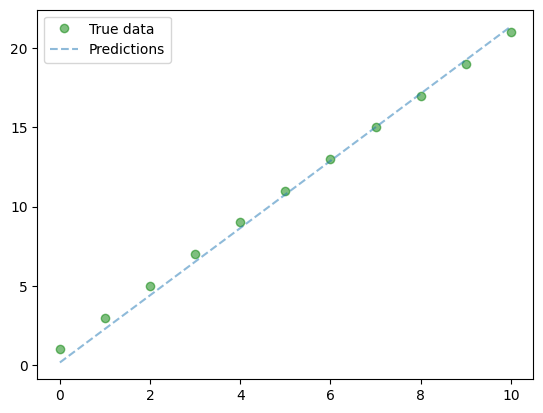

In [21]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

**Save Model**

In [22]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

**Load Model**

In [23]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

## 3. Building a Linear Regression Model with PyTorch (GPU)



**CPU Summary**

In [24]:
import torch
import torch.nn as nn

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()

GPU: 2 things must be on GPU
- `model`
- `tensors with gradients`

In [25]:
import torch
import torch.nn as nn
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 64.0993423461914
epoch 2, loss 5.401559352874756
epoch 3, loss 0.6118358373641968
epoch 4, loss 0.21924158930778503
epoch 5, loss 0.18532785773277283
epoch 6, loss 0.18069171905517578
epoch 7, loss 0.1784646064043045
epoch 8, loss 0.17645463347434998
epoch 9, loss 0.17448273301124573
epoch 10, loss 0.17253436148166656
epoch 11, loss 0.1706075668334961
epoch 12, loss 0.16870243847370148
epoch 13, loss 0.16681863367557526
epoch 14, loss 0.1649557203054428
epoch 15, loss 0.16311366856098175
epoch 16, loss 0.161292165517807
epoch 17, loss 0.15949106216430664
epoch 18, loss 0.15771012008190155
epoch 19, loss 0.15594887733459473
epoch 20, loss 0.15420764684677124
epoch 21, loss 0.1524854451417923
epoch 22, loss 0.15078270435333252
epoch 23, loss 0.14909890294075012
epoch 24, loss 0.14743387699127197
epoch 25, loss 0.1457875519990921
epoch 26, loss 0.14415967464447021
epoch 27, loss 0.1425497978925705
epoch 28, loss 0.14095792174339294
epoch 29, loss 0.13938383758068085
epoch 30

# Summary

- Simple **linear regression basics**
    - $y = Ax + B$
    - $y = 2x + 1$
- **Example** of simple linear regression
- **Aim** of linear regression
    - Minimizing distance between the points and the line
        - Calculate "distance" through `MSE`
        - Calculate `gradients`
        - Update parameters with `parameters = parameters - learning_rate * gradients`
        - Slowly update parameters $A$ and $B$ model the linear relationship between $y$ and $x$ of the form $y = 2x + 1$
- Built a linear regression **model** in **CPU and GPU**
    - Step 1: Create Model Class
    - Step 2: Instantiate Model Class
    - Step 3: Instantiate Loss Class
    - Step 4: Instantiate Optimizer Class
    - Step 5: Train Model
- Important things to be on **GPU**
    - `model`
    - `tensors with gradients`
- How to bring to **GPU**?
    - `model_name.cuda()`
    - `variable_name.cuda()`